In [1]:
from captcha_creation import Captcha

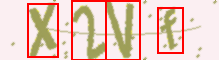

In [18]:
im, bb = Captcha().generate_image("x2Vf")
Captcha().show_image(im, bb)